# Avance Proyecto 1: Análisis exploratorio

### Cantidad de compras registradas por la tienda:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo
df = pd.read_csv("../datasets/customer_purchases/customer_purchases_train.csv")

# Total de compras
total_ventas = len(df)
print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


### Cantidad de clientes:

In [15]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()

print(f"Cantidad de clientes únicos: {unique_customers}")


Cantidad de clientes únicos: 500


### Cantidad de items:

In [16]:
# Contar IDs únicos de items
unique_customers = df['item_id'].nunique()
print(f"Cantidad de items únicos: {unique_customers}")

Cantidad de items únicos: 384


### Edad de usuarios

EDADES DE LOS USUARIOS:
Edad mínima: 18 años
Edad máxima: 74 años
Edad promedio: 41.0 años
Edad mediana: 40.5 años


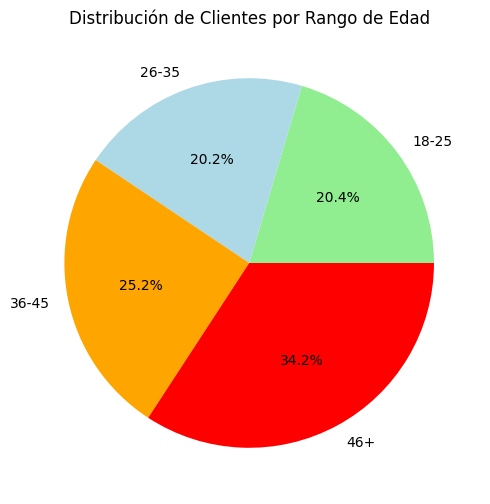


Agregado a 'customer_profile.csv'


In [17]:
# Base con clientes únicos
customer_profile = pd.DataFrame(df['customer_id'].unique(), columns=['customer_id'])

# Total de compras
customer_freq = df['customer_id'].value_counts().reset_index()
customer_freq.columns = ['customer_id','total_compras']
customer_profile = customer_profile.merge(customer_freq, on='customer_id', how='left')

# Género
customer_genders = df.groupby('customer_id')['customer_gender'].first()
customer_profile = customer_profile.merge(customer_genders, on='customer_id', how='left')

# Edad
ref_date = pd.to_datetime("2025-09-21")
df['edad'] = (ref_date - pd.to_datetime(df['customer_date_of_birth'])).dt.days // 365
customer_ages = df.groupby('customer_id')['edad'].first()
customer_profile = customer_profile.merge(customer_ages, on='customer_id', how='left')

print("EDADES DE LOS USUARIOS:")
print(f"Edad mínima: {customer_ages.min()} años")
print(f"Edad máxima: {customer_ages.max()} años")
print(f"Edad promedio: {customer_ages.mean():.1f} años")
print(f"Edad mediana: {customer_ages.median()} años")

# Segmentación por rangos
rangos = {'18-25': (18,25), '26-35': (26,35), '36-45': (36,45), '46+': (46,100)}
segmentos_edad = {}
for rango, (min_e, max_e) in rangos.items():
    if rango == '46+':
        clientes = customer_ages[customer_ages >= min_e]
    else:
        clientes = customer_ages[(customer_ages >= min_e) & (customer_ages <= max_e)]
    segmentos_edad[rango] = len(clientes)

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(segmentos_edad.values(), labels=segmentos_edad.keys(), autopct='%1.1f%%',
        colors=['lightgreen','lightblue','orange','red'])
plt.title('Distribución de Clientes por Rango de Edad')
plt.show()

# Guardar CSV
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Genero de los usuarios:

SEGMENTACIÓN POR GÉNERO:
male: 195 clientes
female: 192 clientes
No specified: 113 clientes


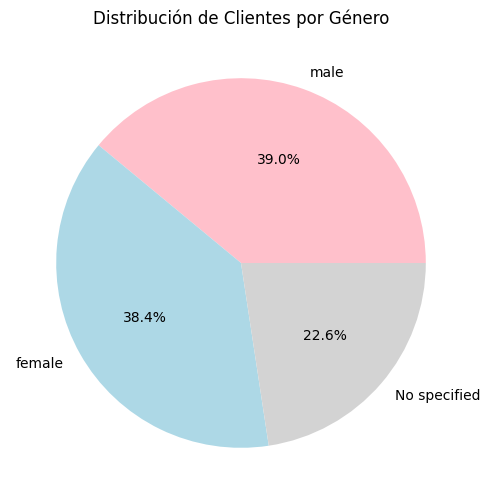


Agregado a 'customer_profile.csv'


In [18]:
# Reemplazar valores nulos por "No specified"
customer_profile['customer_gender'] = customer_profile['customer_gender'].fillna('No specified')

# Conteo y print
genero_counts = customer_profile['customer_gender'].value_counts()

print("SEGMENTACIÓN POR GÉNERO:")
for genero, cantidad in genero_counts.items():
    print(f"{genero}: {cantidad} clientes")

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%',
        colors=['pink','lightblue','lightgray'])
plt.title('Distribución de Clientes por Género')
plt.show()

# Guardar
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")


### Clientes con múltiples compras:

SEGMENTACIÓN DE CLIENTES (cada 5 compras):
1-5 compras: 9 clientes
6-10 compras: 106 clientes
11-15 compras: 189 clientes
16-20 compras: 123 clientes
21-25 compras: 58 clientes
26-30 compras: 13 clientes
31-35 compras: 2 clientes


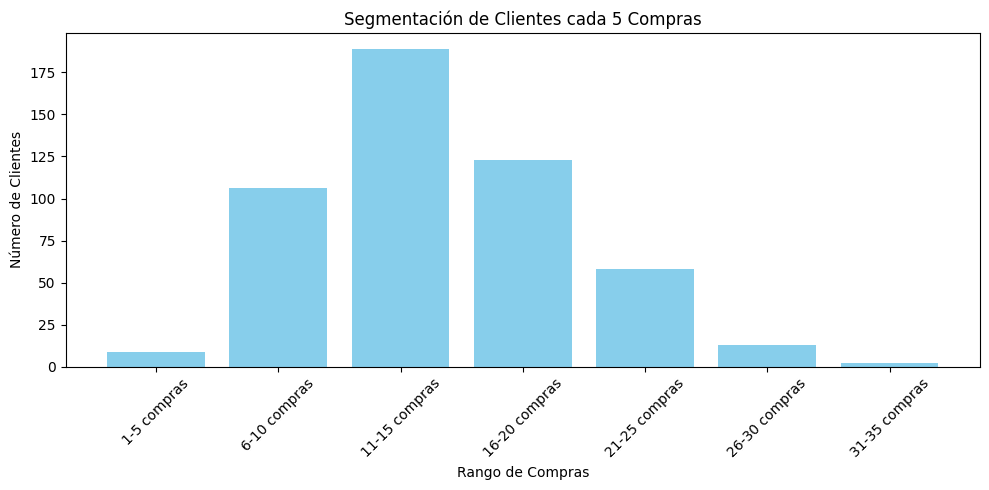


Agregado a 'customer_profile.csv'


In [19]:
# Recalcular total_compras limpio
customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('total_compras')], errors='ignore')
customer_freq = df['customer_id'].value_counts().reset_index()
customer_freq.columns = ['customer_id','total_compras']
customer_profile = customer_profile.merge(customer_freq, on='customer_id', how='left')
customer_profile['total_compras'] = customer_profile['total_compras'].fillna(0).astype(int)

# Segmentación cada 5 compras
segmentos_para_grafico = {}
m = int(customer_profile['total_compras'].max())
for i in range(1, m + 1, 5):
    seg_min, seg_max = i, i + 4
    seg_name = f'{seg_min}-{seg_max} compras'
    n = ((customer_profile['total_compras'] >= seg_min) & (customer_profile['total_compras'] <= seg_max)).sum()
    if n > 0:
        segmentos_para_grafico[seg_name] = int(n)

print("SEGMENTACIÓN DE CLIENTES (cada 5 compras):")
for seg, cant in segmentos_para_grafico.items():
    print(f"{seg}: {cant} clientes")

plt.figure(figsize=(10,5))
plt.bar(list(segmentos_para_grafico.keys()), list(segmentos_para_grafico.values()), color='skyblue')
plt.title('Segmentación de Clientes cada 5 Compras')
plt.xlabel('Rango de Compras')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")


### Promedio de gasto por usuario

PROMEDIO DE GASTO POR USUARIO:
Gasto promedio mínimo: $350.71
Gasto promedio máximo: $2607.73
Gasto promedio general: $1228.63
Gasto promedio mediano: $1256.74


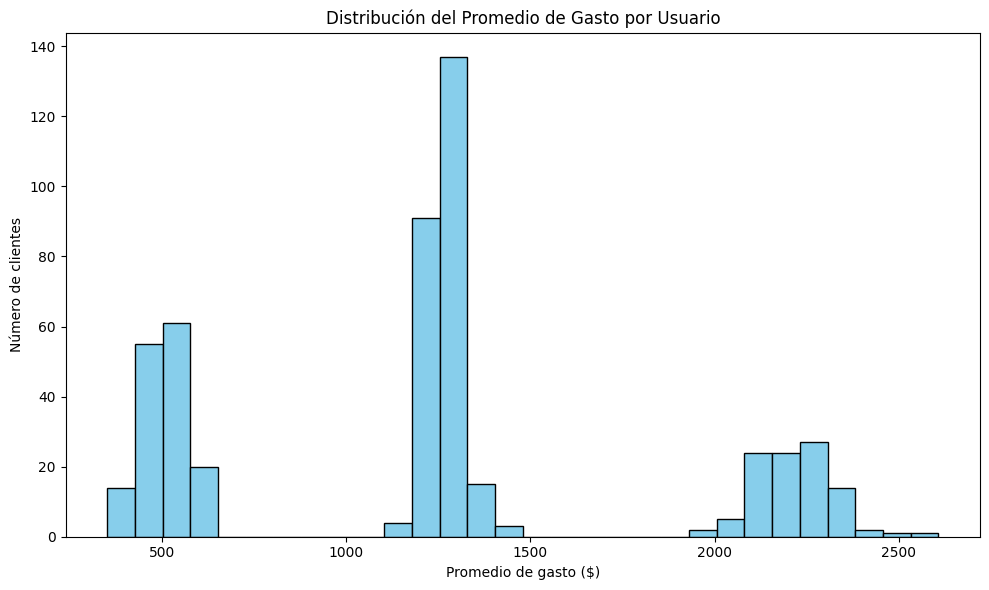


Agregado a 'customer_profile.csv'


In [20]:
# Gasto promedio por cliente
avg_spending = (df.groupby('customer_id')['item_price']
                  .mean().reset_index()
                  .rename(columns={'item_price':'gasto_promedio'}))

# Unir al perfil
customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('gasto_promedio')], errors='ignore')
customer_profile = customer_profile.merge(avg_spending, on='customer_id', how='left')
customer_profile['gasto_promedio'] = customer_profile['gasto_promedio'].fillna(0.0)

# Estadísticas
print("PROMEDIO DE GASTO POR USUARIO:")
print(f"Gasto promedio mínimo: ${customer_profile['gasto_promedio'].min():.2f}")
print(f"Gasto promedio máximo: ${customer_profile['gasto_promedio'].max():.2f}")
print(f"Gasto promedio general: ${customer_profile['gasto_promedio'].mean():.2f}")
print(f"Gasto promedio mediano: ${customer_profile['gasto_promedio'].median():.2f}")

# Gráfico de distribución
plt.figure(figsize=(10,6))
plt.hist(customer_profile['gasto_promedio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Promedio de Gasto por Usuario')
plt.xlabel('Promedio de gasto ($)')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

# Guardar CSV
customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Antigüedad de los clientes:

ANTIGÜEDAD DE LOS CLIENTES:
Antigüedad mínima: 5 días
Antigüedad máxima: 994 días
Antigüedad promedio: 449.4 días
Antigüedad mediana: 418.0 días


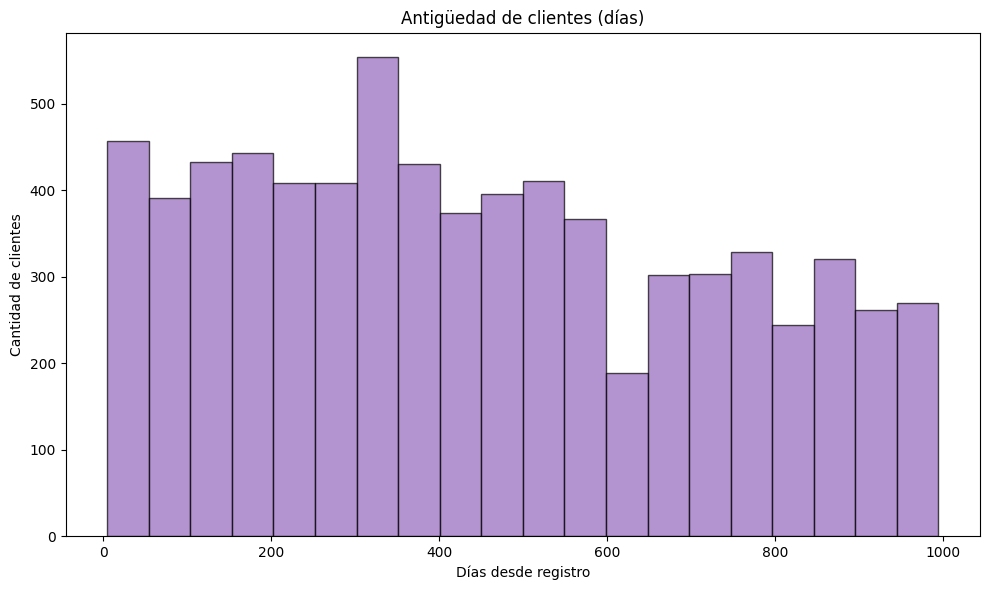


Agregado a 'customer_profile.csv'


In [21]:
# Calcular antigüedad en días al 21/09/2025
df['customer_signup_date'] = pd.to_datetime(df['customer_signup_date'])
df['antiguedad_dias'] = (pd.to_datetime('2025-09-21') - df['customer_signup_date']).dt.days

print("ANTIGÜEDAD DE LOS CLIENTES:")
print(f"Antigüedad mínima: {df['antiguedad_dias'].min()} días")
print(f"Antigüedad máxima: {df['antiguedad_dias'].max()} días") 
print(f"Antigüedad promedio: {df['antiguedad_dias'].mean():.1f} días")
print(f"Antigüedad mediana: {df['antiguedad_dias'].median()} días")

# Histograma
plt.figure(figsize=(10,6))
plt.hist(df['antiguedad_dias'], bins=20, color='#9467bd', edgecolor='black', alpha=0.7)
plt.title("Antigüedad de clientes (días)")
plt.xlabel("Días desde registro")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

# Agregar al perfil de clientes
antiguedad = df.groupby('customer_id')['antiguedad_dias'].first().reset_index()
customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('antiguedad_dias')], errors='ignore')
customer_profile = customer_profile.merge(antiguedad, on='customer_id', how='left')
customer_profile['antiguedad_dias'] = customer_profile['antiguedad_dias'].fillna(0).astype(int)

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")

### Antiguedad VS numero de compras:

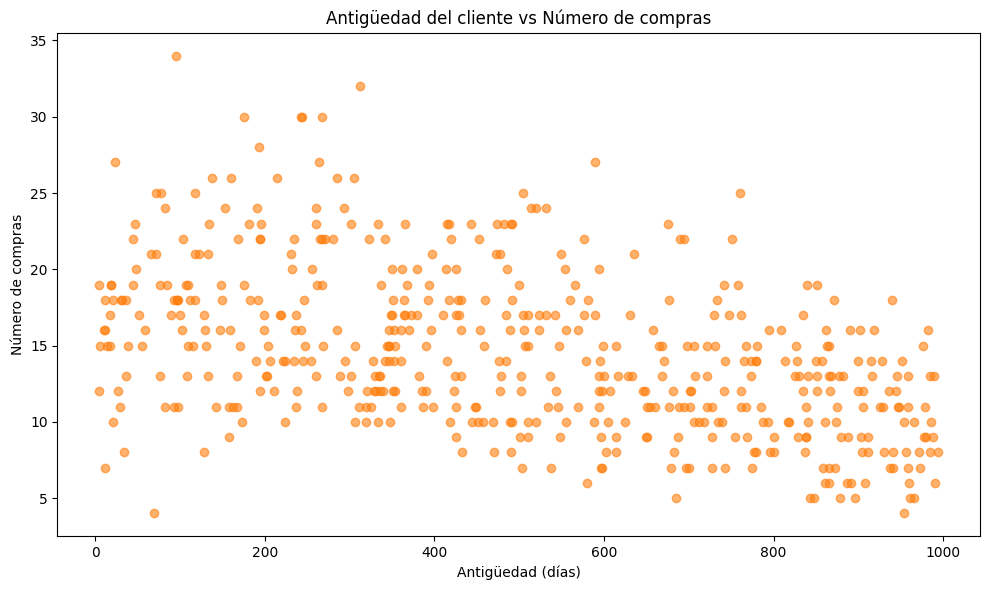

In [22]:
# Solo para la gráfica (usa columnas ya guardadas si tienes customer_profile cargado)
num_compras = customer_profile['total_compras']
antig = customer_profile['antiguedad_dias']

plt.figure(figsize=(10,6))
plt.scatter(antig, num_compras, alpha=0.6, color='#ff7f0e')
plt.title("Antigüedad del cliente vs Número de compras")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Número de compras")
plt.tight_layout()
plt.show()

### Categorias más compradas:

CATEGORÍAS MÁS COMPRADAS:
item_category
shoes     1504
jeans     1029
blouse     926
slacks     676
dress      670
Name: count, dtype: int64


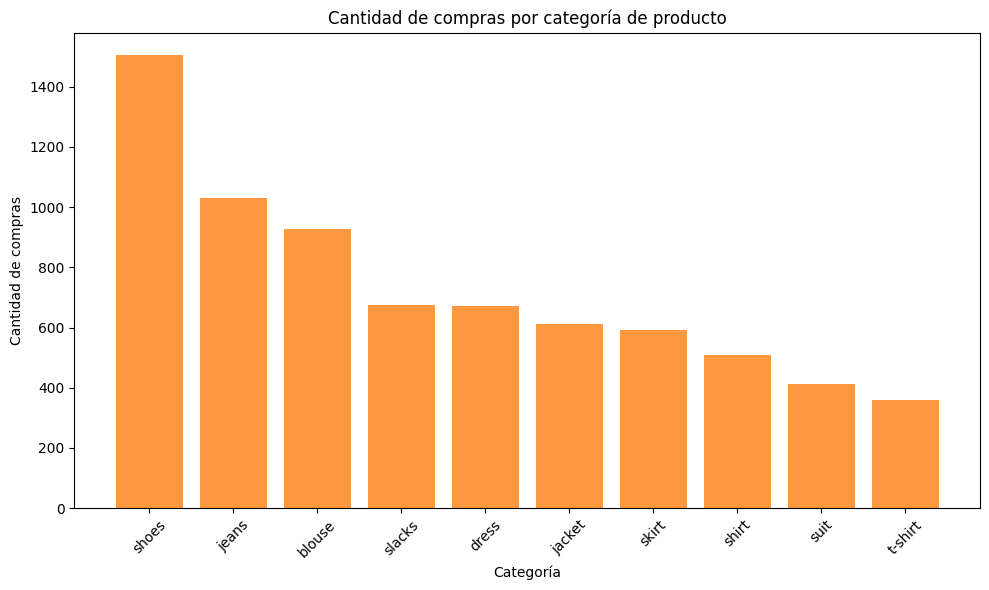


Agregado a 'customer_profile.csv'


In [23]:
# Conteo de categorías más compradas
from matplotlib import pyplot as plt


cat_counts = df['item_category'].value_counts()

print("CATEGORÍAS MÁS COMPRADAS:")
print(cat_counts.head())

# Gráfico
plt.figure(figsize=(10,6))
plt.bar(cat_counts.index, cat_counts.values, color='#ff7f0e', alpha=0.8)
plt.title("Cantidad de compras por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agregar al perfil: categoría más frecuente por cliente
cat_cliente = df.groupby('customer_id')['item_category'].agg(lambda x: x.mode()[0] if not x.mode().empty else "No specified").reset_index()
cat_cliente.columns = ['customer_id','categoria_frecuente']

customer_profile = customer_profile.drop(columns=[c for c in customer_profile.columns if c.startswith('categoria_frecuente')], errors='ignore')
customer_profile = customer_profile.merge(cat_cliente, on='customer_id', how='left')
customer_profile['categoria_frecuente'] = customer_profile['categoria_frecuente'].fillna("No specified")

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")


### Promedio de compras por categoría:

PROMEDIO DE COMPRAS POR CATEGORÍA (todos los clientes):
item_category
blouse     1.85
dress      1.34
jacket     1.23
jeans      2.06
shirt      1.01
shoes      3.01
skirt      1.18
slacks     1.35
suit       0.82
t-shirt    0.72
dtype: float64


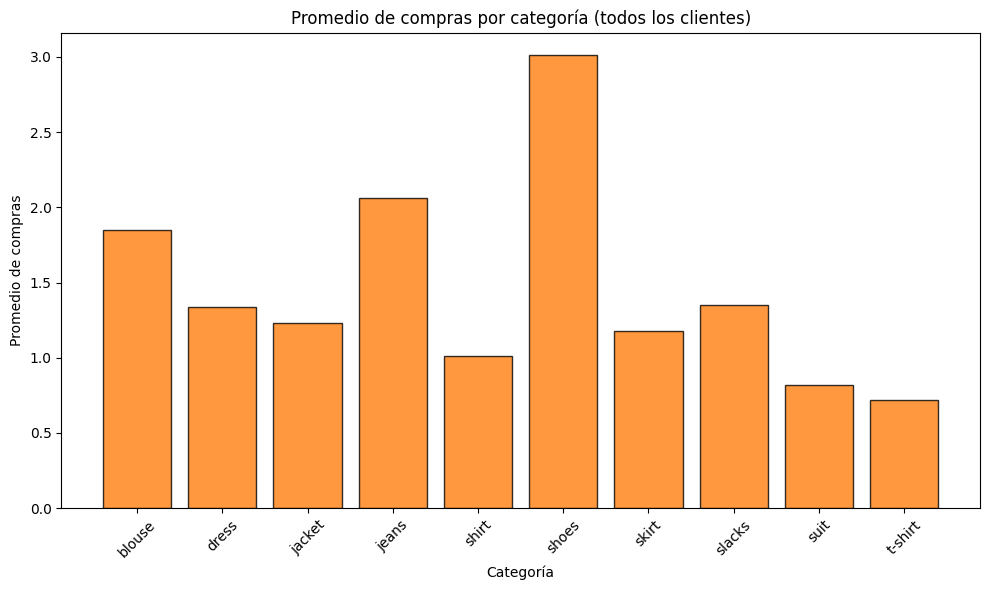


Agregado a 'customer_profile.csv'


In [24]:
# Tabla cliente vs categoría
cliente_tipo = df.pivot_table(index='customer_id', columns='item_category',
                              values='purchase_id', aggfunc='count', fill_value=0)

# Promedio general por categoría
promedios_general = cliente_tipo.mean().round(2)
print("PROMEDIO DE COMPRAS POR CATEGORÍA (todos los clientes):")
print(promedios_general)

# Gráfico del promedio general
plt.figure(figsize=(10,6))
plt.bar(promedios_general.index, promedios_general.values, color='#ff7f0e', alpha=0.8, edgecolor='black')
plt.title("Promedio de compras por categoría (todos los clientes)")
plt.xlabel("Categoría")
plt.ylabel("Promedio de compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar distribución de categorías por cliente en el perfil
customer_profile = customer_profile.drop(
    columns=[c for c in customer_profile.columns if c in cliente_tipo.columns], 
    errors='ignore'
)
customer_profile = customer_profile.merge(cliente_tipo, on='customer_id', how='left')

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'")


### Relación de color de acuerdo al género

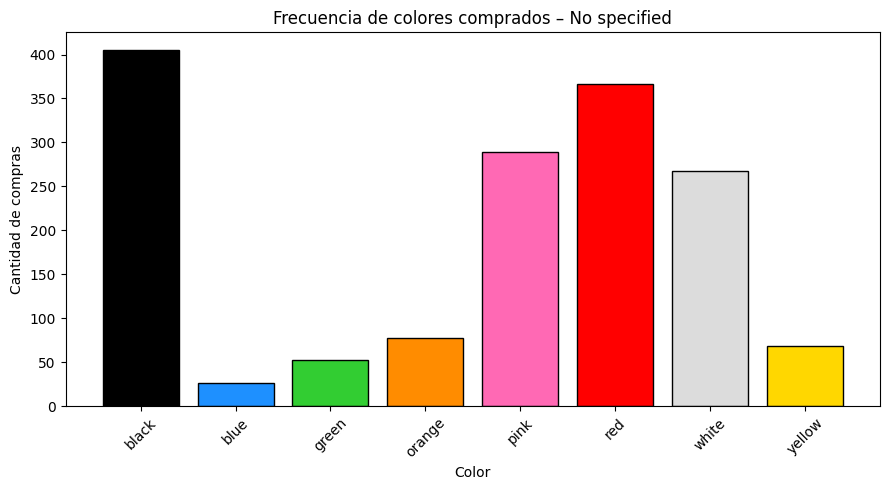

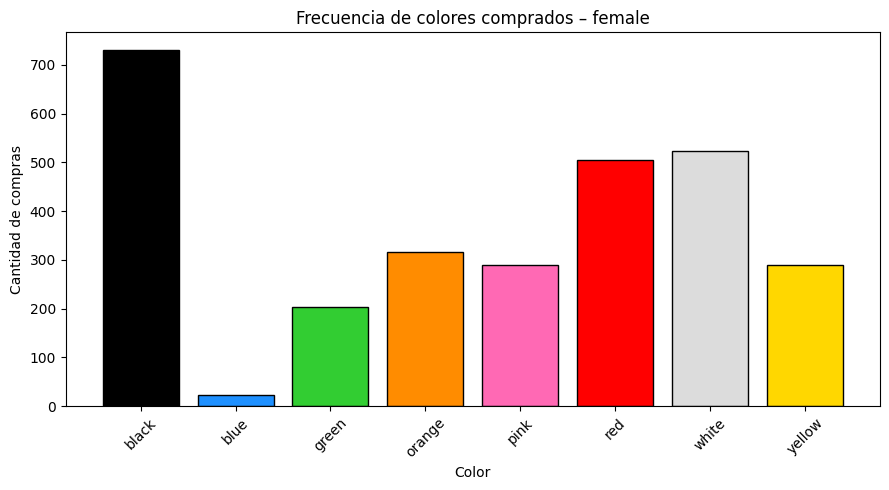

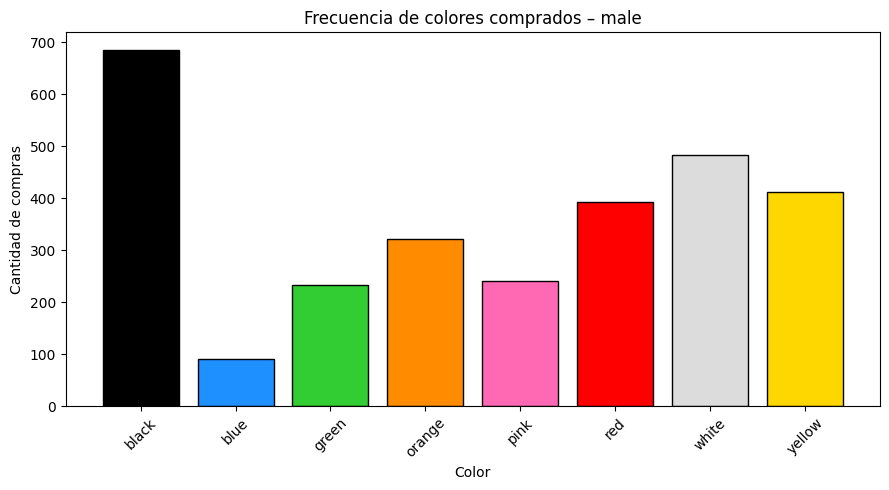


Agregado a 'customer_profile.csv'


In [25]:
# normalizar género
df['customer_gender'] = df['customer_gender'].fillna('No specified')

# mapeo de tags a colores
color_map = {
    "imgy": "yellow",
    "imgb": "blue",
    "imgbl": "black",
    "imgg": "green",
    "imgo": "orange",
    "imgp": "pink",
    "imgr": "red",
    "imgw": "white"
}

# extraer tag y mapear al nombre del color
df['item_color_tag'] = df['item_img_filename'].str.replace('.jpg','',regex=False)
df['item_color'] = df['item_color_tag'].map(color_map).fillna('other')

# conteo de colores por género
color_counts = df.groupby(['customer_gender','item_color']).size().unstack(fill_value=0)

# colores reales para graficar
palette = {
    "yellow":"#FFD700",
    "blue":"#1E90FF",
    "black":"#000000",
    "green":"#32CD32",
    "orange":"#FF8C00",
    "pink":"#FF69B4",
    "red":"#FF0000",
    "white":"#DCDCDC",
    "other":"#A9A9A9"
}

# graficar por género
for g in color_counts.index:
    plt.figure(figsize=(9,5))
    bars = plt.bar(color_counts.columns, color_counts.loc[g].values,
                   edgecolor='black',
                   color=[palette.get(c,"#A9A9A9") for c in color_counts.columns])
    plt.title(f'Frecuencia de colores comprados – {g}')
    plt.xlabel('Color')
    plt.ylabel('Cantidad de compras')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- agregar al CSV ---
by_customer = df.pivot_table(index='customer_id', columns='item_color',
                             values='purchase_id', aggfunc='count', fill_value=0)

# color favorito por cliente
def top_col(row):
    m = row.max()
    return 'No specified' if m == 0 else row.idxmax()

by_customer['favorite_color'] = by_customer.apply(top_col, axis=1)

# unir con customer_profile
if 'customer_profile' not in globals():
    customer_profile = pd.DataFrame(df['customer_id'].unique(), columns=['customer_id'])

cols_to_drop = [c for c in by_customer.columns if c in customer_profile.columns]
customer_profile = customer_profile.drop(columns=cols_to_drop, errors='ignore')
customer_profile = customer_profile.merge(by_customer.reset_index(), on='customer_id', how='left')

# rellenar vacíos
for c in by_customer.columns:
    if c != 'favorite_color':
        customer_profile[c] = customer_profile[c].fillna(0).astype(int)
customer_profile['favorite_color'] = customer_profile['favorite_color'].fillna('No specified')

customer_profile.to_csv("customer_profile.csv", index=False)
print("\nAgregado a 'customer_profile.csv'") 

### Relación de color de acuerdo a la edad

/var/folders/gk/jkm08ww56v5bgfzyy9xr348m0000gn/T/ipykernel_96789/3704297854.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_color = df.groupby(['age_group','item_color']).size().unstack(fill_value=0)


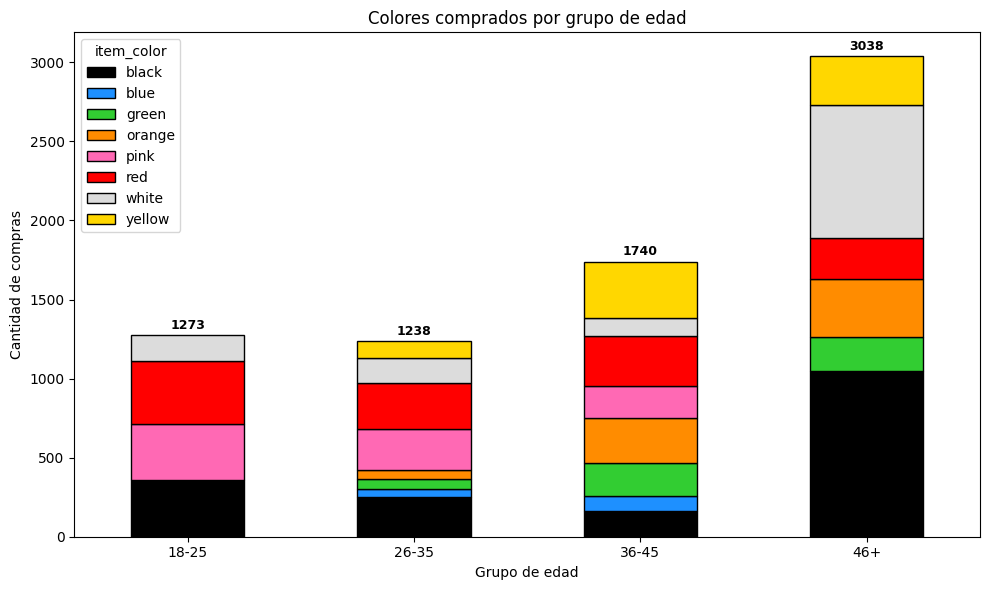

In [27]:
# colores desde item_img_filename
color_map = {"imgy":"yellow","imgb":"blue","imgbl":"black","imgg":"green",
             "imgo":"orange","imgp":"pink","imgr":"red","imgw":"white"}
palette   = {"yellow":"#FFD700","blue":"#1E90FF","black":"#000000","green":"#32CD32",
             "orange":"#FF8C00","pink":"#FF69B4","red":"#FF0000","white":"#DCDCDC"}

df['item_color'] = df['item_img_filename'].str.replace('.jpg','',regex=False).map(color_map).fillna('other')

# edad y grupos
ref = pd.to_datetime("2025-09-21")
df['customer_date_of_birth'] = pd.to_datetime(df['customer_date_of_birth'], errors='coerce')
df['edad'] = ((ref - df['customer_date_of_birth']).dt.days // 365).clip(lower=0)

bins = [0,25,35,45,200]
labels = ['18-25','26-35','36-45','46+']
df['age_group'] = pd.cut(df['edad'].fillna(0), bins=bins, labels=labels, right=True, include_lowest=True)

# tabla: conteo por grupo de edad y color
age_color = df.groupby(['age_group','item_color']).size().unstack(fill_value=0)

# gráfico de barras apiladas (conteos)
ax = age_color.reindex(labels).plot(
    kind='bar', stacked=True, figsize=(10,6),
    color=[palette.get(c, "#A9A9A9") for c in age_color.columns], edgecolor='black'
)
plt.title("Colores comprados por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=0)

# totales arriba de cada barra
for i, total in enumerate(age_color.sum(axis=1)):
    plt.text(i, total + 20, str(total), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()